In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_addons

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import pandas as pd

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

rm: cannot remove '/root/.kaggle': No such file or directory
100% 2.59G/2.59G [01:41<00:00, 26.6MB/s]
100% 2.59G/2.59G [01:41<00:00, 27.5MB/s]


In [ ]:
!mv "/content/ham1000-segmentation-and-classification.zip" "/content/drive/MyDrive/SKIN CANCER Work"

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/SKIN CANCER Work/ham1000-segmentation-and-classification.zip","r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/SKIN CANCER Work")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/SKIN CANCER Work/GroundTruth.csv')
data['label'] = data.iloc[:, 1:].idxmax(axis=1)
data['image']=data['image'].apply(lambda x: f'/content/drive/MyDrive/SKIN CANCER Work/images/{x}.jpg')
data.drop(columns=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], inplace=True)
data['label']=LabelEncoder().fit_transform(data['label'])
data.head()

,image,label
0,/content/drive/MyDrive/SKIN CANCER Work/images...,5
1,/content/drive/MyDrive/SKIN CANCER Work/images...,5
2,/content/drive/MyDrive/SKIN CANCER Work/images...,5
3,/content/drive/MyDrive/SKIN CANCER Work/images...,5
4,/content/drive/MyDrive/SKIN CANCER Work/images...,4


In [ ]:
from sklearn.utils import shuffle

In [ ]:
data['label'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64

In [ ]:
a=data[data['label']==0][:700]
b=data[data['label']==1][:700]
c=data[data['label']==2][:700]
d=data[data['label']==3][:700]
e=data[data['label']==4][:700]
f=data[data['label']==5][:700]
g=data[data['label']==6][:700]
data=pd.concat([a,b,c,d,e,f,g], axis=0)
data=data.sample(frac = 1)
data.head()

,image,label
3374,/content/drive/MyDrive/SKIN CANCER Work/images...,2
7671,/content/drive/MyDrive/SKIN CANCER Work/images...,4
5952,/content/drive/MyDrive/SKIN CANCER Work/images...,2
3817,/content/drive/MyDrive/SKIN CANCER Work/images...,2
19,/content/drive/MyDrive/SKIN CANCER Work/images...,5


In [ ]:
data['label'].value_counts()

2    700
4    700
5    700
1    514
0    327
6    142
3    115
Name: label, dtype: int64

In [ ]:
from keras.utils import to_categorical

In [ ]:
import cv2
k=1
DATA=[]
for path, y in zip(data['image'], data['label']):
  image_= cv2.imread(path)
  image_=cv2.resize(image_, (128,128))
  DATA.append((image_, y))
  print(k)
  k+=1
DATA=np.array(shuffle(DATA))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-11-29c0a69cb62b>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  DATA=np.array(shuffle(DATA))


In [ ]:
Images = np.array([ i for i in DATA[:,0]]).reshape((len(DATA),128,128,3))
Labels= np.array(DATA[:,1])

In [ ]:
Images.shape

(3198, 128, 128, 3)

In [ ]:
x_train, y_train, x_test, y_test = Images[:2600], Labels[:2600], Images[2600:], Labels[2600:]
y_train=to_categorical(y_train, 7)
y_test=to_categorical(y_test, 7)

In [ ]:
num_classes = 7
input_shape = (128,128,3)
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (2600, 128, 128, 3) - y_train shape: (2600, 7)
x_test shape: (598, 128, 128, 3) - y_test shape: (598, 7)


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 50
image_size = 128  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [256, 128]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 16 X 16
Patches per image: 64
Elements per patch: 768


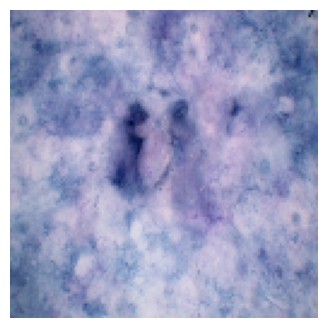

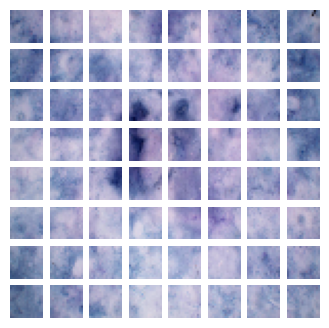

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]/255.0
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes, activation='sigmoid')(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from tensorflow import keras

In [ ]:

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
         loss='categorical_crossentropy',
        metrics=[tf.keras.metrics.CategoricalAccuracy(),keras.metrics.Recall(), keras.metrics.Precision(),
                 keras.metrics.AUC()]
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=32,
        epochs=60,
        validation_data=(x_test, y_test),
        # callbacks=[checkpoint_callback],
    )
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/60
82/82 [==============================] - 17s 67ms/step - loss: 2.3965 - categorical_accuracy: 0.2585 - recall_5: 0.6462 - precision_5: 0.1851 - auc_5: 0.6177 - val_loss: 1.5647 - val_categorical_accuracy: 0.3846 - val_recall_5: 0.7542 - val_precision_5: 0.2338 - val_auc_5: 0.7453
Epoch 2/60
82/82 [==============================] - 6s 78ms/step - loss: 1.7522 - categorical_accuracy: 0.3438 - recall_5: 0.7492 - precision_5: 0.2041 - auc_5: 0.6909 - val_loss: 1.5797 - val_categorical_accuracy: 0.4666 - val_recall_5: 0.8712 - val_precision_5: 0.2118 - val_auc_5: 0.7567
Epoch 3/60
82/82 [==============================] - 3s 40ms/step - loss: 1.7065 - categorical_accuracy: 0.3323 - recall_5: 0.7962 - precision_5: 0.2097 - auc_5: 0.7080 - val_loss: 1.5754 - val_categorical_accuracy: 0.4431 - val_recall_5: 0.8428 - val_precision_5: 0.2037 - val_auc_5: 0.7403
Epoch 4/60
82/82 [==============================] - 3s 39ms/step - loss: 1.6641 - categorical_accuracy: 0.3488 - recall_5: 0.8

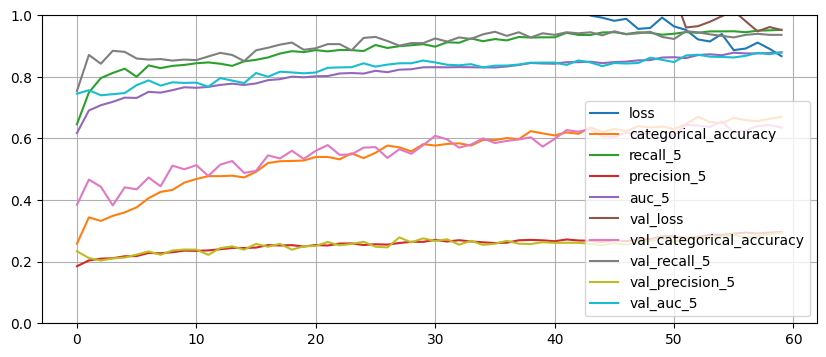

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
vit_classifier.evaluate(x_test, y_test)

19/19 [==============================] - 1s 30ms/step - loss: 0.9524 - categorical_accuracy: 0.6355 - recall_5: 0.9365 - precision_5: 0.2946 - auc_5: 0.8797


[0.9523552060127258,
 0.6354514956474304,
 0.9364548325538635,
 0.294581800699234,
 0.8797177672386169]

## 1. EfficientNet Model (Tranfer Learning )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

from tensorflow.keras.applications import EfficientNetB0

inputs = layers.Input(shape=(128, 128, 3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(7, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.Recall(), keras.metrics. Precision()]
)
hist = model.fit(x_train ,y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/50
82/82 [==============================] - 21s 78ms/step - loss: 2.3677 - categorical_accuracy: 0.4458 - recall_6: 0.4096 - precision_6: 0.4688 - val_loss: 1.5625 - val_categorical_accuracy: 0.4548 - val_recall_6: 0.3796 - val_precision_6: 0.5124
Epoch 2/50
82/82 [==============================] - 3s 42ms/step - loss: 2.0250 - categorical_accuracy: 0.5019 - recall_6: 0.4762 - precision_6: 0.5241 - val_loss: 1.9303 - val_categorical_accuracy: 0.4348 - val_recall_6: 0.4047 - val_precision_6: 0.4663
Epoch 3/50
82/82 [==============================] - 3s 43ms/step - loss: 1.8465 - categorical_accuracy: 0.5212 - recall_6: 0.4919 - precision_6: 0.5452 - val_loss: 1.6709 - val_categorical_accuracy: 0.4967 - val_recall_6: 0.4515 - val_precision_6: 0.5422
Epoch 4/50
82/82 [==============================] - 3s 38ms/step - loss: 1.7452 - categorical_accuracy: 0.5269 - recall_6: 0.4981 - precision_6: 0.5527 - val_loss: 1.647

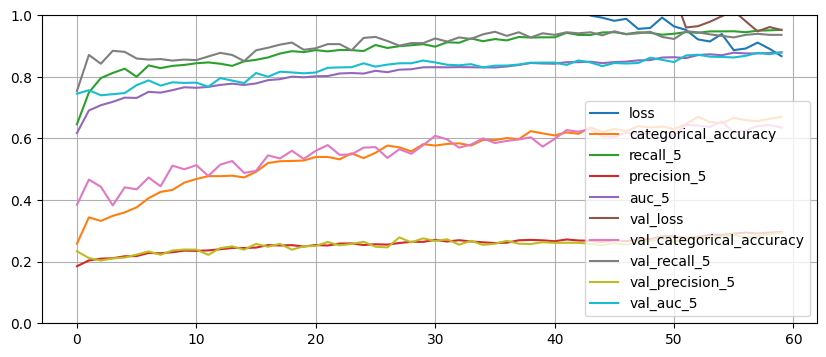

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 28ms/step - loss: 1.3225 - categorical_accuracy: 0.5234 - recall_6: 0.4649 - precision_6: 0.6004


[1.3224748373031616,
 0.5234113931655884,
 0.4648829400539398,
 0.6004319787025452]

## 2. Inception ResNetV2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

from tensorflow.keras.applications import InceptionResNetV2

inputs = layers.Input(shape=(128, 128, 3))
x = img_augmentation(inputs)
model = InceptionResNetV2(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(7, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", keras.metrics.Recall(), keras.metrics. Precision()]
)
hist = model.fit(x_train ,y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

219055592/219055592 [==============================] - 5s 0us/step
Epoch 1/50
82/82 [==============================] - 36s 187ms/step - loss: 3.5788 - accuracy: 0.2750 - recall_7: 0.2004 - precision_7: 0.2939 - val_loss: 3.3887 - val_accuracy: 0.2860 - val_recall_7: 0.2274 - val_precision_7: 0.3317
Epoch 2/50
82/82 [==============================] - 6s 78ms/step - loss: 2.4827 - accuracy: 0.2746 - recall_7: 0.1750 - precision_7: 0.3173 - val_loss: 1.9027 - val_accuracy: 0.3562 - val_recall_7: 0.1923 - val_precision_7: 0.4772
Epoch 3/50
82/82 [==============================] - 6s 78ms/step - loss: 2.4410 - accuracy: 0.2977 - recall_7: 0.1962 - precision_7: 0.3529 - val_loss: 2.4849 - val_accuracy: 0.2224 - val_recall_7: 0.1338 - val_precision_7: 0.2564
Epoch 4/50
82/82 [==============================] - 6s 73ms/step - loss: 2.5402 - accuracy: 0.2719 - recall_7: 0.1796 - precision_7: 0.3095 - val_loss: 2.0221 - val_accuracy: 0.2592 - val_recall_7: 0.0418 - val_precision_7: 0.1866
Epoch 5

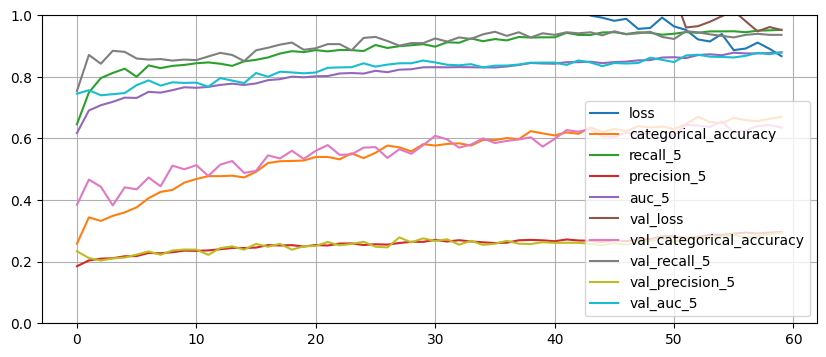

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 62ms/step - loss: 1.5751 - accuracy: 0.3997 - recall_7: 0.0936 - precision_7: 0.7671


[1.575143575668335,
 0.39966556429862976,
 0.09364548325538635,
 0.767123281955719]

# 3. DenseNet121

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

inputs = layers.Input(shape=(128, 128, 3))
x = img_augmentation(inputs)
model = keras.applications.densenet.DenseNet121(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(7, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", keras.metrics.Recall(), keras.metrics. Precision()]
)
hist = model.fit(x_train ,y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/50
82/82 [==============================] - 20s 117ms/step - loss: 1.8292 - accuracy: 0.4596 - recall_8: 0.3823 - precision_8: 0.5097 - val_loss: 2.6106 - val_accuracy: 0.2826 - val_recall_8: 0.2274 - val_precision_8: 0.3185
Epoch 2/50
82/82 [==============================] - 3s 43ms/step - loss: 1.5576 - accuracy: 0.5000 - recall_8: 0.4208 - precision_8: 0.5534 - val_loss: 2.1896 - val_accuracy: 0.4197 - val_recall_8: 0.3344 - val_precision_8: 0.4773
Epoch 3/50
82/82 [==============================] - 4s 44ms/step - loss: 1.4292 - accuracy: 0.5165 - recall_8: 0.4427 - precision_8: 0.5866 - val_loss: 1.9831 - val_accuracy: 0.3545 - val_recall_8: 0.2876 - val_precision_8: 0.4185
Epoch 4/50
82/82 [==============================] - 4s 49ms/step - loss: 1.3878 - accuracy: 0.5262 - recall_8: 0.4365 - precision_8: 0.6086 - val_loss: 1.8562 - val_accuracy: 0.4047 - val_recall_8: 0.3244 - val_precision_8: 0.4697
Epoch 5/5

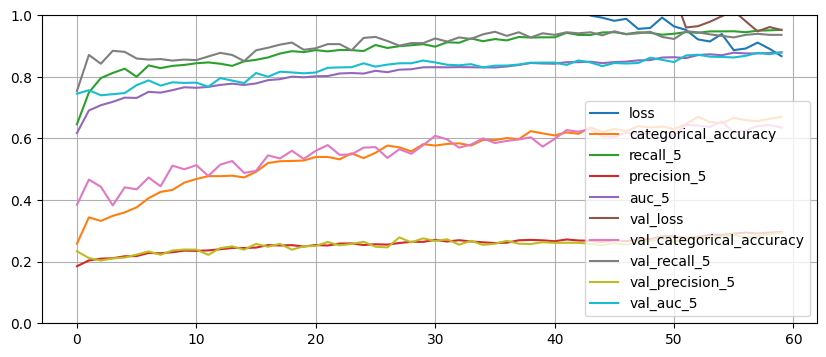

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
pd.DataFrame(history.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 33ms/step - loss: 1.7276 - accuracy: 0.4231 - recall_8: 0.3562 - precision_8: 0.4874


[1.727563738822937,
 0.42307692766189575,
 0.35618728399276733,
 0.4874141812324524]